## Data Analysis on World CO2 Data
Drawing upon our knowledge in Python and its data science libraries—Pandas, NumPy, and Matplotlib—__we can leverage our expertise in addressing pressing global challenges__. This case study specifically delves into __examining the historical extent of climate change__. 

We will be looking at the dataset provide by the World Bank: [CO2 emissions (metric tons per capita)](https://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv).

__But, first we must understand the dataset!__

## Understanding Climate Change, thus the Dataset


The specific .csv file in the zip file downloaded is titled "API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5995557". The file name will be manually changed into "World CO2 Data" for better naming convention.

__Understanding Climate Change__

People often ask, _Why is CO2 emissions a prime indicator of climate change? Why not other metrics?_ 

The [United States Environmental Protection Agency](https://www.epa.gov/report-environment/greenhouse-gases) addresses this by highlighting that CO2 emissions presently constitute the largest share of the warming linked to human activities. This allows us to draw parallels between CO2 emissions and its climate effects. 

__Understanding the Dataset__

Now that we know CO2 emissions are directly tied to climate change, __let's check out the actual data__. 

__The dataset outlines the CO2 emissions in metric tons per capita__. This means each entry in the dataset corresponds to the amount of CO2 emitted per person in a given region or country. Additionally, __there's a total entry of 266 countries' data from 1960 to 2022__. However, among those 266 countries exist continents and regions. This must be kept in mind later on.

It is important to note, however, __that the dataset contains some missing values__; we must address this later using Pandas.

Analyzing this data allows us to discern patterns and trends, revealing which areas contribute more significantly to per capita emissions.

## The Big Question

With the bigger picture in mind, we can now frame some questions that would provide us further insights to the climate change problem. The questions we should address are:
1. What are the top 5 countries with the highest CO2 emissions per capita in the last 10 years?
2. What are the bottom 5 countries with the highest CO2 emissions per capita in the last 10 years? 
3. Which 3 countries saw the larest increase in CO2 emissions change (by percentage difference) during COVID years?
4. Which 3 countries saw the largest decrease in CO2 emissions change (by percentage difference) during COVID years?
5. How many countries increase their emissions?
6. Over the last 5 years, is there more countries with people that increase or decrease their CO2 emissions?
7. Have the world reduce or increase CO2 emissions per capita?
8. Which country have the biggest single year increase in CO2 emissions per capita?
9. Which country have the biggest single year decrease in CO2 emissions per capita (not counting COVID)?

__To address the questions above, we can use the aforementioned libraries to gain further insight.__


## Procedures to perform data analysis on given dataset

### imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Creating and Cleaning Dataframe by reading the .csv dataset

Cleaning and preprocessing a dataset is crucial for optimal data analysis. In our case, __the CSV file initially contains four rows of comments unrelated to the dataset, disrupting the expected structure__. To remedy this, we can __skip these comment rows when creating a Pandas dataframe__. 

We can usse the `pd.read_csv()` function to read the contents of the CSV file into a Pandas DataFrame and to skip the unwanted rows we can use `df = pd.read_csv('your_file.csv', skiprows=4)`

In [77]:
df = pd.read_csv('World CO2 Data.csv', skiprows=4)

This ensures that the dataset is free from irrelevant information and ready for further analysis, minimizing potential parsing issues and enabling a smooth data exploration process.

__Now, let's take a peek at the dataframe object—df we've created.__ To get a good general overview, we should implement multiple viewing methods.

We can use the `df.columns` to get all columns from the dataframe data.

In [78]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

The column headers above are mostly as expected. But, there exist a column header: 'Unnamed:67'. __This column appears to be unnamed or might be an extra column with no clear label__. It's common to encounter such columns when reading CSV files, and __it can be dropped if not needed.__ 

We should use `df.head` and `df.tail` to get the first and last few rows respectively. Just to get a better picture.

In [79]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN


In [80]:
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,NaN,NaN,NaN
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,NaN,NaN,NaN
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,NaN,NaN,NaN
265,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.866838,0.846962,0.723062,0.663069,0.735435,0.663338,0.530484,NaN,NaN,NaN


This clearly illustrates that __some rows have empty values between 1960 to 2022__, indicating that a country has no data on CO2 emissions per capita. Additionally, __we can suspect that some columns have empty values__, indicating that there is no data on that specific year.

To address this, we can write a query that _checks if a column header in a dataframe has any rows of value at all if not then delete the column header and checks if a row in a dataframe has any value at all between 1960 to 2022 if not then delete the corresponding row._ We can do so like such below:

In [81]:
# Identify rows with no values between '1960' and '2022'
empty_rows = df[df.loc[:, '1960':'2022'].isnull().all(axis=1)]

# Drop rows with no values between '1960' and '2022'
df = df.drop(empty_rows.index)

# Reset index after dropping rows
df = df.reset_index(drop=True)

`df.loc[:, '1960':'2022']`: Selects columns from '1960' to '2022' inclusive.

`df.loc[:, '1960':'2022'].isnull().all(axis=1)`: Checks if all values in each row within the specified columns are null.

`df[df.loc[:, '1960':'2022'].isnull().all(axis=1)]`: Filters rows where all values between '1960' and '2022' are null.

`df = df.drop(empty_rows.index)`: Drops the rows identified as empty.

`df.reset_index(drop=True)`: Resets the index of the DataFrame after dropping rows.

In [82]:
# Check if any column has all NaN values
empty_columns = df.columns[df.isnull().all()]

# Drop columns with all NaN values
df = df.drop(empty_columns, axis=1)

__Let's see the changes due to the codes above.__

In [83]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'],
      dtype='object')

Many of the column headers are now deleted from the dataframe. __There's no more columns for 1960 to 1989 and 2021 to 2022__.

__This proves that empty columns exist from the raw dataset, meaning there is no data on CO2 emissions from 1960 to 1989 and 2021 to 2022.__ Let's try to see the head and tail of the dataframe again.

In [84]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,...,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
2,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,...,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,...,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550


Before, we can see that the first entry to the dataframe is the country "Aruba", now it is "Africa Eastern and Southern". This indicates that Aruba had completely empty values from 1960 to 2022.

In [85]:
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
234,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.529176,0.579131,0.606011,0.656505,0.597318,0.666659,...,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782
235,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,...,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
236,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,...,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
237,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,...,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903
238,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.634929,1.763473,1.735620,1.581818,1.469850,1.408363,...,0.871932,0.901214,0.901248,0.866838,0.846962,0.723062,0.663069,0.735435,0.663338,0.530484


The tail also shows that the country without data is dropped from the dataframe.

__This means our preprocessing is succesful and we only kept the countries with data.__

## Addresing the Questions

### 1. What are the top 5 countries with the highest CO2 emissions per capita in the last 10 years?
### 2. What are the bottom 5 countries with the highest CO2 emissions per capita in the last 10 years? 

Let's choose the specific columns of interest. Our focus is on data from the past 10 years, and we only require information related to the respective countries. Consequently, we need to create a subset of the dataframe to meet these criteria.

In [86]:
# select columns
selected_columns = ['Country Name', 'Country Code'] + [str(year) for year in range(2011, 2021)]

`['Country Name', 'Country Code']`: This is a list of column names that you want to include in your selection.

`+ [str(year) for year in range(2011, 2021)]`: This part generates a list of strings representing the years from 2011 to 2020. It uses a list comprehension to convert each year to a string. The + operator is then used to concatenate this list with the list of initial column names.

In [87]:
# Create a subset of the original dataframe
df_last10years=df[selected_columns]

# Displaying it in a code cell. Works only for jupyter notebook.
df_last10years

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
1,Afghanistan,AFG,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
2,Africa Western and Central,AFW,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
3,Angola,AGO,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
4,Albania,ALB,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782
235,"Yemen, Rep.",YEM,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
236,South Africa,ZAF,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
237,Zambia,ZMB,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903


`df_last10years = df[selected_columns]`: This selects the columns specified in the selected_columns list from your DataFrame (df). It creates a new DataFrame (df_last10years) containing only the selected columns.

Now that we identified the data from the last 10 years, __let's average these values over the last 10 years and assign them to a column.__

This is can be achieved by __using the mean function along the rows (axis=1) for columns starting from the third column (index 2) onwards__, where the CO2 emissions data is located.

In [88]:
# Create a copy of the DataFrame
df_last10years = df_last10years.copy()

# Create a new column with average values
df_last10years['Average CO2 Emissions per Capita (Metric Ton)'] = df_last10years.iloc[:, 2:].mean(axis=1)

# Display the modified DataFrame
df_last10years

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton)
0,Africa Eastern and Southern,AFE,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,0.944915
1,Afghanistan,AFG,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,0.299346
2,Africa Western and Central,AFW,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,0.472913
3,Angola,AGO,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,0.912358
4,Albania,ALB,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,1.707063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782,1.104180
235,"Yemen, Rep.",YEM,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,0.589407
236,South Africa,ZAF,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,7.702962
237,Zambia,ZMB,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,0.333570


`df_last10years.iloc[:, 2:].mean(axis=1)`: This part calculates the mean along each row (axis=1) for the columns starting from the third column (index 2) onward since the CO2 emissions data starts from the third column. This will result in a Series of average values, one for each row.

`df_last10years.loc[:, 'Average CO2 Emissions per Capita (Metric Ton)']`: This part creates a new column in the DataFrame (df_last10years) with the calculated average values. The .loc accessor is used to modify the original DataFrame, and the new column is named 'Average CO2 Emissions per Capita (Metric Ton)'.

Now with the Average calculated and displayed, __we can now take the top 5 and bottom 5 countries with the most polluting people.__ We can do this by first ranking the most polluting to the least polluting.

In [89]:
# Sort values by Average CO2 Emissions per Capita (Metric Ton) in descending order
df_last10years_sorted = df_last10years.sort_values(by='Average CO2 Emissions per Capita (Metric Ton)', ascending=False)

In [90]:
top5 = df_last10years_sorted.head(5)
top5

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton)
179,Qatar,QAT,37.979493,39.582140,37.602880,37.105034,35.290422,33.549569,32.256638,31.480967,31.877203,31.726842,34.845119
114,Kuwait,KWT,26.493555,25.132421,23.958143,22.749990,22.775020,22.572698,21.910401,21.461230,21.135214,21.169610,22.935828
20,Bahrain,BHR,21.465303,22.184125,22.868842,23.096571,22.385625,21.495310,20.946038,20.737962,22.063355,21.976908,21.922004
7,United Arab Emirates,ARE,19.431780,20.275652,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272,20.679139
28,Brunei Darussalam,BRN,18.262990,17.951032,17.509752,16.993155,15.180679,16.358212,16.943078,17.362310,16.111933,21.705812,17.437895


Interestingly, the most polluting people over the last 10 years come from Qatar, Kuwait, Bahrain, UAE, and Brunei Darussalam. These countries have exhibited a notable trend of higher carbon emissions or environmental impact per capita during this period. 

__Investigating into the specific factors contributing to their elevated environmental footprint could provide valuable insights into potential areas for targeted sustainability initiatives or policy interventions.__ 

In [91]:
bottom5 = df_last10years_sorted.tail(5)
bottom5

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton)
151,Malawi,MWI,0.070816,0.069084,0.072034,0.063454,0.064320,0.070297,0.077993,0.087620,0.087119,0.084636,0.074737
191,Somalia,SOM,0.051773,0.050296,0.050527,0.048530,0.046949,0.045785,0.044059,0.042573,0.041029,0.039935,0.046146
14,Burundi,BDI,0.037998,0.037180,0.036100,0.034760,0.034194,0.040538,0.047429,0.057850,0.059571,0.058384,0.044400
39,"Congo, Dem. Rep.",COD,0.043943,0.039822,0.053900,0.067549,0.041082,0.029732,0.033755,0.032311,0.033715,0.032585,0.040840
31,Central African Republic,CAF,0.041040,0.041313,0.025112,0.027174,0.038263,0.042087,0.044509,0.044968,0.045188,0.044282,0.039393


Interestingly, the least polluting people over the last 10 years come from Malawi, Somalia, Burundi, Congo DRC, and the Central African Republic. This observation highlights a commendable trend in these nations, where the per capita environmental impact or carbon emissions have been notably lower compared to other regions. 

__Additionally, identifying the successful strategies implemented by these countries may serve as inspiration for global initiatives aimed at promoting environmentally responsible behavior and fostering a more sustainable future.__

To get a better understanding of the data, __we can plot our findings using matplotlib.pylot__ and place it against leading economic countries like US, Germany, China, South Africa, and India. 

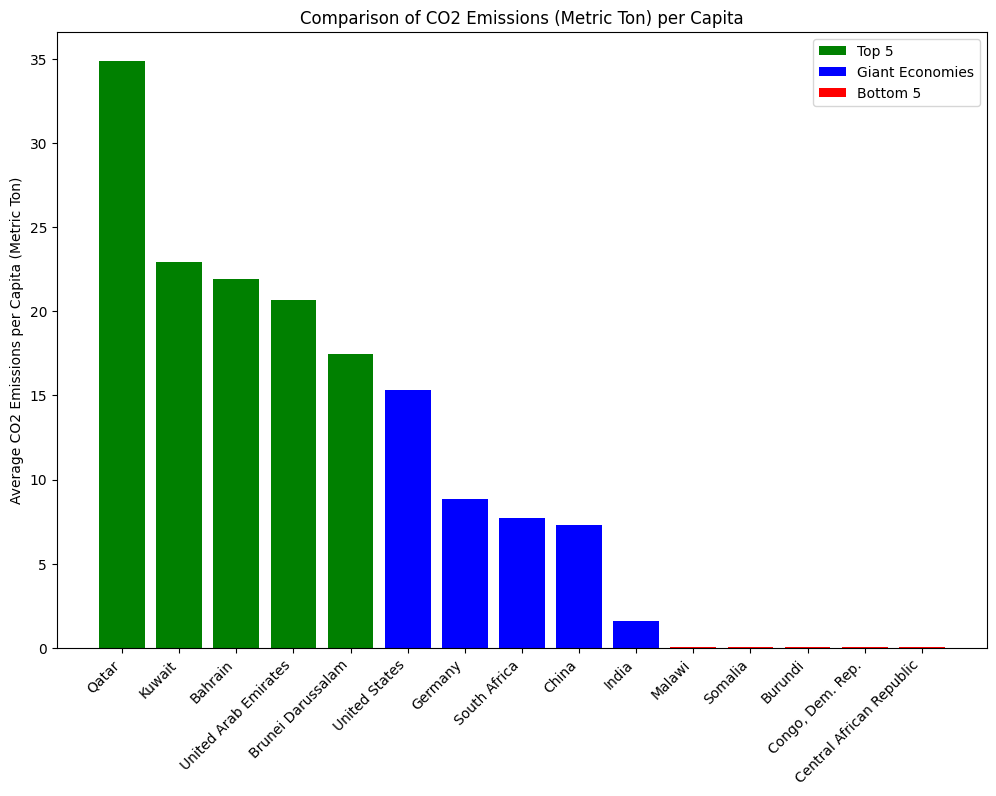

In [92]:
import matplotlib.pyplot as plt

selected_countries = ['United States', 'India', 'China', 'Germany', 'South Africa']

# Filter data for specific countries and sort them based on average
giant_economies = df_last10years[df_last10years['Country Name'].isin(selected_countries)]
giant_economies = giant_economies.sort_values(by='Average CO2 Emissions per Capita (Metric Ton)', ascending=False)

# Plotting both top and bottom 5 rows along with the giant economies in one diagram
plt.figure(figsize=(12, 8)) #In this case, the figure size is set 12:8 width-height ratio.

# Plotting top 5 rows in green
plt.bar(top5['Country Name'], # This part is specifying the x-axis values for the bar chart.
        top5['Average CO2 Emissions per Capita (Metric Ton)'], # This part specifies the y-axis values for the bar chart.
        color='green', label='Top 5') # color and label

# Plotting filtered countries in blue, using same format as above
plt.bar(giant_economies['Country Name'],
        giant_economies['Average CO2 Emissions per Capita (Metric Ton)'],
        color='blue', label='Giant Economies')

# Plotting bottom 5 rows in red, using same format as above
plt.bar(bottom5['Country Name'],
        bottom5['Average CO2 Emissions per Capita (Metric Ton)'],
        color='red', label='Bottom 5')


plt.ylabel('Average CO2 Emissions per Capita (Metric Ton)')
plt.title('Comparison of CO2 Emissions (Metric Ton) per Capita')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.legend()  # Show legend to distinguish between top, bottom, and selected countries
plt.show()

__Answer to Q1 and Q2__

1. Qatar, Kuwait, Bahrain, UAE, Brunei Darussalam
2. Central African Republic, Congo, Dem. Rep., Burundi, Somalia, Malawi 

__Conclusion__

Entering into this analysis, one might intuitively __expect that countries such as the United States, China, and India__—the usual suspects—__would house the most polluting individuals.__ 

However, contrary to such assumptions, __the findings from the data analysis reveal a different reality.__ This discrepancy underscores the significance of relying on data-driven decision-making processes to prevent misinformation and ensure accurate insights into complex phenomena such as carbon emissions.

### 3. Which 3 countries saw the larest increase in CO2 emissions change (by percentage difference) during COVID years?
### 4. Which 3 countries saw the largest decrease in CO2 emissions change (by percentage difference) during COVID years?
### 5. How many countries increase their emissions?

We can buld upon the dataframe—`df_last10years` to __calculate percentage difference between the year before COVID (2019) against the year during COVID (2020)__

We can actually do this another way, by taking the average over the last 10 years before covid (2010 to 2019). __We choose the former because this approach allows us to directly assess the impact of the pandemic on the data points for these two specific years__. By isolating this timeframe, __we can capture the immediate effects of the COVID-19 crisis on the variables of interest, offering insights into how certain factors may have changed in response to the global event.__

In [93]:
# Check the dataframe to make sure it's the one that we want
df_last10years

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton)
0,Africa Eastern and Southern,AFE,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,0.944915
1,Afghanistan,AFG,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,0.299346
2,Africa Western and Central,AFW,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,0.472913
3,Angola,AGO,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,0.912358
4,Albania,ALB,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,1.707063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782,1.104180
235,"Yemen, Rep.",YEM,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,0.589407
236,South Africa,ZAF,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,7.702962
237,Zambia,ZMB,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,0.333570


In [94]:
# Step 1: Take the CO2 emissions value for COVID year
covid_year = df_last10years[['2020']].mean(axis=1)

# Step 2: Take the 2019 year (before COVID)
year_2019 =df_last10years['2019']

# Step 3: Apply formula: percentage_difference = (B - A) / (abs(A + B) / 2) * 100
percentage_difference = ((covid_year - year_2019) / (abs(year_2019 + covid_year) / 2)) * 100

# Step 4: Name the series so that we can concatenate it to the dataframe
percentage_difference.name = 'Percentage Difference'

# Step 5: Concatenate it to the dataframe
df_with_percentage_difference = pd.concat([df_last10years, percentage_difference], axis=1)

# Step 6: Display
df_with_percentage_difference

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton),Percentage Difference
0,Africa Eastern and Southern,AFE,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,0.944915,-14.014510
1,Afghanistan,AFG,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,0.299346,-28.437133
2,Africa Western and Central,AFW,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,0.472913,-5.804479
3,Angola,AGO,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,0.912358,-23.900399
4,Albania,ALB,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,1.707063,-12.441503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782,1.104180,-31.145033
235,"Yemen, Rep.",YEM,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,0.589407,-13.973869
236,South Africa,ZAF,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,7.702962,-13.930324
237,Zambia,ZMB,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,0.333570,-3.046571


__We can now sort the new dataframe.__ Also, let's now drop the columns from 2011 to 2018, because we don't need to see it. __Additionaly, let's rename '2019' to 'Before Covid (2019)' and '2020' to 'Covid Year (2020)'.__

In [95]:
# Assign new_column_names to replace column names
new_column_names = {'2019': 'Before Covid (2019)', '2020': 'Covid Year (2020)'}

# Rename the columns
df_with_percentage_difference.rename(columns=new_column_names, inplace=True)

# Assign columns to drop indices
columns_to_drop_indices = list(range(2, 10)) # Makes a list starting from 2 to 9

# Drop the columns
df_with_percentage_difference = df_with_percentage_difference.drop(columns=df_with_percentage_difference.columns[columns_to_drop_indices])

# Sort
df_with_percentage_difference = df_with_percentage_difference.sort_values(by='Percentage Difference', ascending=False)

# Display
df_with_percentage_difference

,Country Name,Country Code,Before Covid (2019),Covid Year (2020),Average CO2 Emissions per Capita (Metric Ton),Percentage Difference
28,Brunei Darussalam,BRN,16.111933,21.705812,17.437895,29.583358
9,Armenia,ARM,2.196552,2.404684,1.956175,9.046760
160,Nepal,NPL,0.480725,0.509366,0.352963,5.785589
76,Ghana,GHA,0.572265,0.602887,0.507820,5.211674
16,Benin,BEN,0.608237,0.631205,0.543567,3.706190
...,...,...,...,...,...,...
232,Vanuatu,VUT,0.548285,0.389175,0.505598,-33.944837
65,Estonia,EST,7.582120,5.338400,11.502805,-34.731115
104,Jamaica,JAM,2.983290,2.069042,2.642515,-36.191128
230,"Venezuela, RB",VEN,3.710599,2.545028,4.906059,-37.264724


In [96]:
top3_perc_diff = df_with_percentage_difference.head(3)
top3_perc_diff

,Country Name,Country Code,Before Covid (2019),Covid Year (2020),Average CO2 Emissions per Capita (Metric Ton),Percentage Difference
28,Brunei Darussalam,BRN,16.111933,21.705812,17.437895,29.583358
9,Armenia,ARM,2.196552,2.404684,1.956175,9.046760
160,Nepal,NPL,0.480725,0.509366,0.352963,5.785589


In [97]:
bot3_perc_diff = df_with_percentage_difference.tail(3)
bot3_perc_diff

,Country Name,Country Code,Before Covid (2019),Covid Year (2020),Average CO2 Emissions per Capita (Metric Ton),Percentage Difference
104,Jamaica,JAM,2.983290,2.069042,2.642515,-36.191128
230,"Venezuela, RB",VEN,3.710599,2.545028,4.906059,-37.264724
135,Madagascar,MDG,0.142654,0.097270,0.121908,-37.832148


From the above, it is clear that the __3 countries with the largest increase in CO2 emissions per capita is Brunei Darussalam, Armenia, and Nepal.__ and the __3 countries with the largest decrease in CO2 emissions is Madagascar, Venezuela RB, and Jamaica.__

__For better context, let's plot a graph against the giant economies like before.__ We can use this [documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) to inform us.

In [98]:
import numpy as np

selected_countries = ['United States', 'India', 'China', 'Germany', 'South Africa']

# Filter data for specific countries and sort them based on Percentage Difference
giant_economies = df_with_percentage_difference[df_with_percentage_difference['Country Name'].isin(selected_countries)]
giant_economies = giant_economies.sort_values(by='Percentage Difference', ascending=False)

# Combine top 3, bottom 3, and specific countries
combined_df = pd.concat([top3_perc_diff, giant_economies, bot3_perc_diff])

combined_df

,Country Name,Country Code,Before Covid (2019),Covid Year (2020),Average CO2 Emissions per Capita (Metric Ton),Percentage Difference
28,Brunei Darussalam,BRN,16.111933,21.705812,17.437895,29.583358
9,Armenia,ARM,2.196552,2.404684,1.956175,9.046760
160,Nepal,NPL,0.480725,0.509366,0.352963,5.785589
36,China,CHN,7.645436,7.756138,7.298295,1.437543
49,Germany,DEU,7.927188,7.255221,8.820116,-8.851910
97,India,IND,1.752534,1.576093,1.616561,-10.601434
227,United States,USA,14.673381,13.032828,15.300791,-11.842492
236,South Africa,ZAF,7.688908,6.687563,7.702962,-13.930324
104,Jamaica,JAM,2.983290,2.069042,2.642515,-36.191128
230,"Venezuela, RB",VEN,3.710599,2.545028,4.906059,-37.264724


According to the documentation, we should only concern ourselves with 2 columns which are 'Before Covid (2019)' and 'Covid Year (2020)'. __So let's drop the other columns__

In [99]:
# Keep the columns...
columns_to_keep = ['Before Covid (2019)', 'Covid Year (2020)']

# Drop columns not in 'columns_to_keep'
combined_df_filtered = combined_df[columns_to_keep]

combined_df_filtered

,Before Covid (2019),Covid Year (2020)
28,16.111933,21.705812
9,2.196552,2.404684
160,0.480725,0.509366
36,7.645436,7.756138
49,7.927188,7.255221
97,1.752534,1.576093
227,14.673381,13.032828
236,7.688908,6.687563
104,2.983290,2.069042
230,3.710599,2.545028


__Now, we can start plotting!__

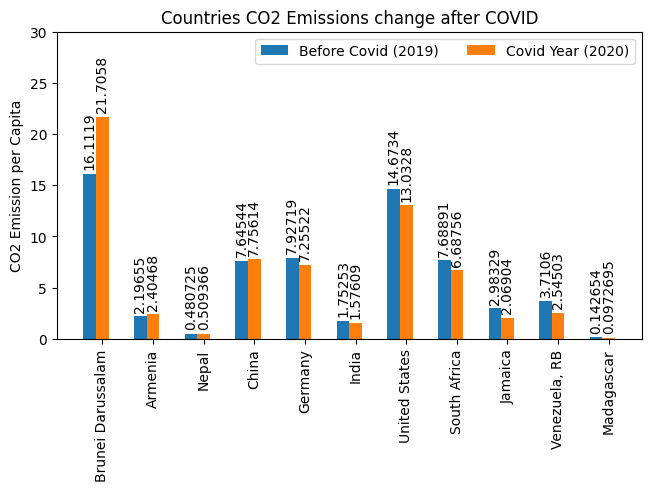

In [100]:
x = np.arange(len(combined_df['Country Name'])) # Create an array of x-axis positions based on the number of countries
width = 0.25 # Width of each bar in the bar chart
multiplier = 0 # Initialize a multiplier for offsetting bars in each group

# Create a subplots figure and axis
fig, ax = plt.subplots(layout='constrained')

# Iterate through columns (years) and values in the filtered DataFrame
for year, val in combined_df_filtered.items():
    offset = width * multiplier    # Calculate the offset for positioning bars in each group
    rects = ax.bar(x + offset, val, width, label=year)    # Create bars for the current year
    ax.bar_label(rects, padding=3, rotation=90)    # Add labels on top of the bars
    multiplier += 1    # Update the multiplier for the next group of bars

ax.set_ylabel('CO2 Emission per Capita') # Set y-axis label
ax.set_title('Countries CO2 Emissions change after COVID') # Set the title of the plot
ax.set_xticks(x + width, combined_df['Country Name']) # Set x-axis ticks and labels
ax.legend(loc='upper right', ncols=len(combined_df['Country Name'])) # Add a legend to the upper right corner
ax.set_ylim(0, 30) # Set the y-axis limit

# Rotate the x-axis labels diagonally
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

__From the above, it is clear that increasing CO2 emissions during COVID year is an anomaly, especially with Brunei Darussalam, as the giant economies themselves reduce CO2 emissions.__ 

The graph also suggest that although percentage difference can be very different, __the absolute difference before and after covid is quite similar for all countries__

Let's see how many of these anomaly country (increasing CO2 emissions) there are. We can do this by checking for a positive percentage difference value.

In [101]:
# Filter countries with a positive percentage difference
positive_difference_countries = df_with_percentage_difference[df_with_percentage_difference['Percentage Difference'] > 0]
positive_difference_countries = positive_difference_countries[['Country Name', 'Country Code', 'Percentage Difference']]

# Displays
positive_difference_countries

,Country Name,Country Code,Percentage Difference
28,Brunei Darussalam,BRN,29.583358
9,Armenia,ARM,9.046760
160,Nepal,NPL,5.785589
76,Ghana,GHA,5.211674
16,Benin,BEN,3.706190
231,Viet Nam,VNM,2.997995
107,Kazakhstan,KAZ,2.209291
142,Mali,MLI,2.132954
110,Cambodia,KHM,1.885896
210,Tajikistan,TJK,1.785546


__Excluding the regions with 'East Asia & Pacific' there's a total of 18 countries that increased their emissions.__

__Answers to Q3, Q4, Q5__

3. 3 countries with the largest increase in CO2 emissions per capita is Brunei Darussalam, Armenia, and Nepal.
4. 3 countries with the largest decrease in CO2 emissions is Madagascar, Venezuela RB, and Jamaica
5. There are 18 countries that increased their emissions

__Conclusion__

Undoubtedly, COVID had a synchronous impact on global CO2 activity. The preceding graph indicated that the absolute difference in CO2 emissions per capita was relatively consistent. __This implies that individuals from diverse countries may exhibit distinct "operating baselines" for their CO2 emissions.__ This observation holds significance for international policymaking, particularly in the allocation of climate change responsibilities. __For instance, it underscores that individuals in the U.S. consistently contribute more to CO2 emissions than their counterparts in Germany, prompting considerations for equitable and effective international climate policies.__ 

### 6. Over the last 5 years, is there more countries with people that increase or decrease their CO2 emissions?
### 7. Have the world reduce or increase CO2 emissions per capita?

__Let's see if there are any improvements among the masses at reducing their CO2 emissions. Let's check the dataframe-df_last10years__

In [102]:
df_last10years

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average CO2 Emissions per Capita (Metric Ton)
0,Africa Eastern and Southern,AFE,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,0.944915
1,Afghanistan,AFG,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,0.299346
2,Africa Western and Central,AFW,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,0.472913
3,Angola,AGO,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,0.912358
4,Albania,ALB,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,1.707063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782,1.104180
235,"Yemen, Rep.",YEM,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,0.589407
236,South Africa,ZAF,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,7.702962
237,Zambia,ZMB,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,0.333570


__Let's remove 2020 COVID Year, because in general everyone reduced their emissions, and start from 2015 til 2019.__

In [103]:
# Calculate the difference between CO2 emissions in 2015 and 2019
df_last10years['CO2 Change'] = df_last10years['2019'] - df_last10years['2015']

# Filter countries with a reduction in CO2 emissions
reduced_emission_countries = df_last10years[df_last10years['CO2 Change'] < 0]

# Display the resulting DataFrame
reduced_emission_countries[['Country Name', 'CO2 Change']]

,Country Name,CO2 Change
0,Africa Eastern and Southern,-0.045136
1,Afghanistan,-0.000408
3,Angola,-0.371547
5,Andorra,-0.198565
6,Arab World,-0.269367
...,...,...
229,St. Vincent and the Grenadines,-0.074276
230,"Venezuela, RB",-1.632618
233,World,-0.018761
235,"Yemen, Rep.",-0.120375


__The above shows that there is 106 entries, allthought not all of them are countries.__ This is great, because we can notice that the World has slightly reduced their CO2 emissions per capita.

In [104]:
# Filter countries with a reduction in CO2 emissions
increased_emission = df_last10years[df_last10years['CO2 Change'] >= 0]

# Display the resulting DataFrame
increased_emission[['Country Name', 'CO2 Change']]

,Country Name,CO2 Change
2,Africa Western and Central,0.015261
4,Albania,0.084244
9,Armenia,0.340300
10,Antigua and Barbuda,0.075342
13,Azerbaijan,0.250701
...,...,...
231,Viet Nam,1.382034
232,Vanuatu,0.062461
234,Samoa,0.174087
236,South Africa,0.081719


__The above shows there is 133 entries, although not all of them are countries__

__Answer to Q6, Q7__

6. Since 133 entries > 106 entries, there is more countries that increased their emissions per capita than reduce it over the last 5 years.
7. The world has reduced it's emissions per capita in general over the last 5 years by 0.018761 Metric Ton of CO2.

__Conclusion__

__The very slight reduction in emissions per capita is not encouraging. This suggest that there is not enough effort from individuals to reduce their emissions.__

### 8. Which country have the biggest single year increase in CO2 emissions per capita?
### 9. Which country have the biggest single year decrease in CO2 emissions per capita (not counting COVID)?

__We should search the whole dataset to asnwer the questions, thus we should use dataframe-df__

In [105]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,...,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
2,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,...,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,...,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.529176,0.579131,0.606011,0.656505,0.597318,0.666659,...,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782
235,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,...,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
236,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,...,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
237,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,...,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903


__To find the year with the biggest change in CO2 emissions per capita for each country, you can calculate the difference between consecutive years and then identify the maximum change.__

In [106]:
# Extract the columns related to CO2 emissions
country_and_years = ['Country Name'] + [str(year) for year in range(1990, 2020)]

# Create a new DataFrame with only CO2 columns
df_selected = df[country_and_years]

# Calculate the change in emissions for each year
co2_changes = df_selected.drop('Country Name', axis=1).diff(axis=1)

# Find the rows where the CO2 emission value for the year before is not 0
nonzero_changes_mask = (co2_changes.shift(axis=1, fill_value=0) != 0)
nonzero_changes = co2_changes[nonzero_changes_mask]

# Find the column (year) with the largest change for each country
max_change_year = nonzero_changes.idxmax(axis=1)

# Find the maximum change value for each country
max_change_value = nonzero_changes.max(axis=1)

# Create a DataFrame with the results
result_df_increase = pd.DataFrame({
    'Country': df['Country Name'],
    'Year of Largest Change': max_change_year.values,
    'Changed by Value': max_change_value.values,
})

# Add CO2 emissions on the 'Year of Largest Change'
result_df_increase['CO2 Emissions on Max Change Year'] = df_selected.apply(
    lambda row: row[max_change_year[row.name]], axis=1
)

# Add CO2 emissions for the year before the 'Year of Largest Change'
result_df_increase['CO2 Emissions on Year Before Max Change'] = df_selected.apply(
    lambda row: row[str(int(max_change_year[row.name]) - 1)] if max_change_year[row.name].isdigit() and int(max_change_year[row.name]) > 1990 else None,
    axis=1
)

# Sort the DataFrame by the 'Changed by Value' column in descending order
result_df_increase = result_df_increase.sort_values(by='Changed by Value', ascending=False)

# Display the results
result_df_increase

,Country,Year of Largest Change,Changed by Value,CO2 Emissions on Max Change Year,CO2 Emissions on Year Before Max Change
114,Kuwait,1992,8.379716,14.220246,5.840530
28,Brunei Darussalam,2006,6.562619,20.173387,13.610768
179,Qatar,1997,6.550538,46.118807,39.568269
65,Estonia,2010,3.368070,13.894666,10.526596
119,Libya,2012,3.227229,9.934649,6.707420
...,...,...,...,...,...
223,Uganda,2007,0.013408,0.096801,0.083393
14,Burundi,2010,0.012678,0.035424,0.022746
87,Heavily indebted poor countries (HIPC),2011,0.011759,0.239230,0.227472
151,Malawi,2018,0.009628,0.087620,0.077993


__Kuwait has the highest increase in CO2 emissions per capita value in 1992.__

Let's write the code for lowest 

In [107]:
# Extract the columns related to CO2 emissions
selected_columns = ['Country Name'] + [str(year) for year in range(1990, 2020)]

# Create a new DataFrame with only CO2 columns
df_selected_decrease = df[selected_columns]

# Calculate the change in emissions for each year
co2_changes_decrease = df_selected.drop('Country Name', axis=1).diff(axis=1)

# Find the rows where the CO2 emission value for the year before is not 0
nonzero_changes_mask = (co2_changes_decrease.shift(axis=1, fill_value=0) != 0)
nonzero_changes = co2_changes_decrease[nonzero_changes_mask]

# Find the minimum change and corresponding year for each country
min_decrease_year = nonzero_changes.idxmin(axis=1)
min_decrease_value = nonzero_changes.min(axis=1)

# Create the result DataFrame
result_df_decrease = pd.DataFrame({
    'Country': df['Country Name'],
    'Year of Largest Change': min_decrease_year.values,
    'Changed by Value': min_decrease_value.values,
})

# Add CO2 emissions on the 'Year of Largest Change'
result_df_decrease['CO2 Emissions on Max Change Year'] = df_selected.apply(
    lambda row: row[min_decrease_year[row.name]], axis=1
)


# Add CO2 emissions for the year before the 'Year of Largest Change'
result_df_decrease['CO2 Emissions on Year Before Max Change'] = df_selected.apply(
    lambda row: row[str(int(min_decrease_year[row.name]) - 1)] if min_decrease_year[row.name].isdigit() and int(min_decrease_year[row.name]) > 1990 else None,
    axis=1
)


# Sort the DataFrame by the 'Changed by Value' column in descending order
result_df_decrease = result_df_decrease.sort_values(by='Changed by Value', ascending=True)


# Display the results
result_df_decrease


,Country,Year of Largest Change,Changed by Value,CO2 Emissions on Max Change Year,CO2 Emissions on Year Before Max Change
114,Kuwait,1991,-11.550203,5.840530,17.390733
131,Luxembourg,1995,-5.637523,21.192781,26.830303
65,Estonia,1992,-5.402496,15.009285,20.411781
130,Lithuania,1992,-3.852796,5.404698,9.257494
179,Qatar,2008,-3.719507,36.889946,40.609452
...,...,...,...,...,...
151,Malawi,2014,-0.008580,0.063454,0.072034
223,Uganda,1994,-0.005758,0.036061,0.041819
17,Burkina Faso,2001,-0.004660,0.083612,0.088272
122,Least developed countries: UN classification,1991,-0.004245,0.124919,0.129164


__Kuwait has the largest decrease in CO2 emissions per capita value in 1991.__

Let's graph this change over a line graph, and limit it to the 20 largest positive change and 20 largest negative change.

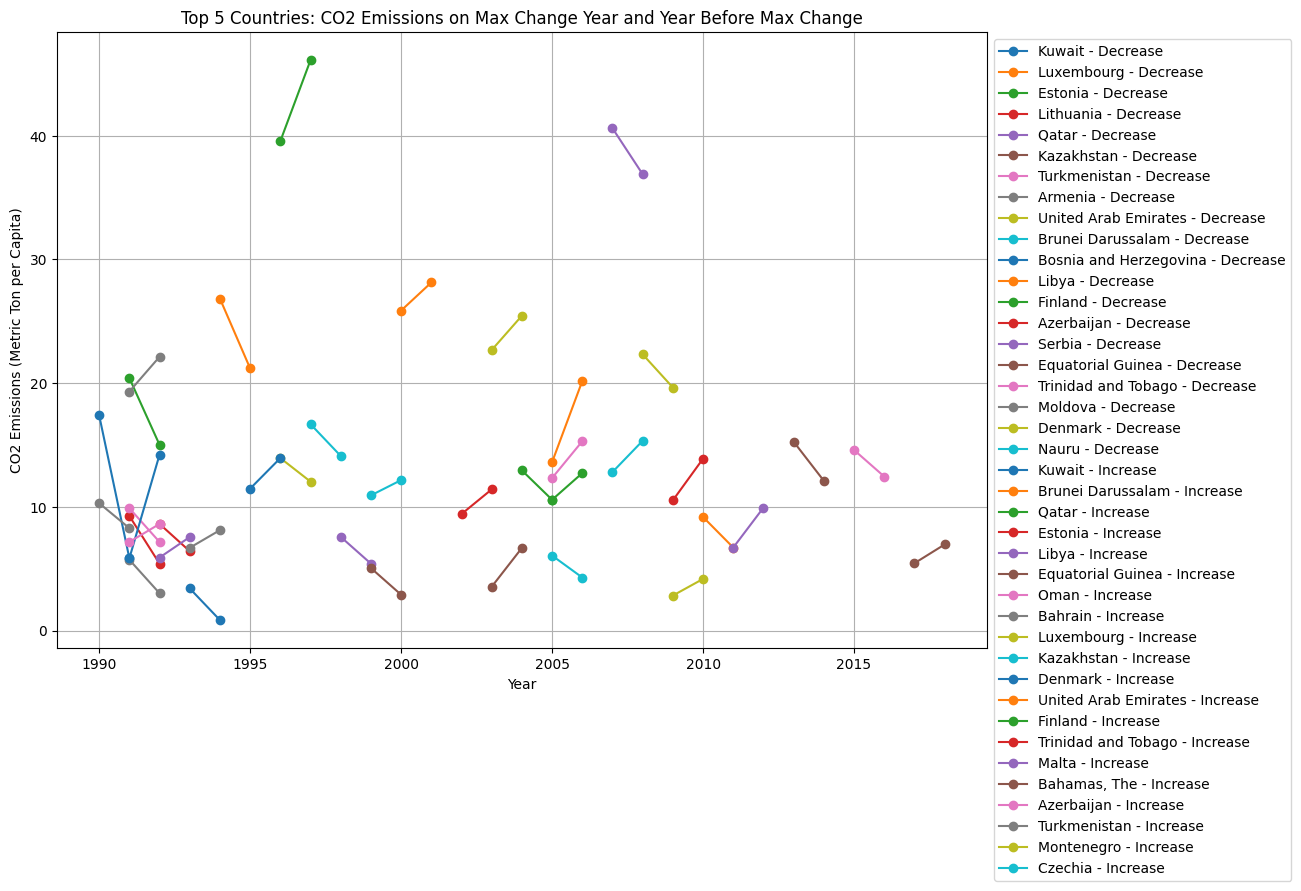

In [108]:
# Select the top 5 countries for both decrease and increase
top_5_decrease = result_df_decrease.head(20)
top_5_increase = result_df_increase.head(20)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the data for the top 5 countries with the largest decrease
for i, row in top_5_decrease.iterrows():
    plt.plot([int(row['Year of Largest Change']) - 1, int(row['Year of Largest Change'])],
             [row['CO2 Emissions on Year Before Max Change'], row['CO2 Emissions on Max Change Year']],
             marker='o', label=f'{row["Country"]} - Decrease')

# Plot the data for the top 5 countries with the largest increase3
for i, row in top_5_increase.iterrows():
    plt.plot([int(row['Year of Largest Change']) - 1, int(row['Year of Largest Change'])],
             [row['CO2 Emissions on Year Before Max Change'], row['CO2 Emissions on Max Change Year']],
             marker='o', label=f'{row["Country"]} - Increase')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Metric Ton per Capita)')
plt.title('Top 5 Countries: CO2 Emissions on Max Change Year and Year Before Max Change')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.show()

__Answer to Q8 Q9__

Q8. Kuwait has the highest increase in CO2 emissions per capita value in 1992.
Q9. Kuwait has the highest decrease in CO2 emissions per capita value in 1991.

__Conclusion__

__Kuwait experienced the largest increase and decrease in CO2 emissions per capita in 1992 and 1991, respectively, indicating an unstable period, coinciding with the Gulf War.__ This illustrates that data analysis can affirm the impact of geopolitical events on environmental indicators. In the context of Python and Data Science, __this underscores the importance of using programming languages and data analysis tools to gain insights into real-world situations. It exemplifies a spillover effect__, where our initial investigation into climate impact revealed additional problems that require attention. 